In [1]:
import os
import tarfile
from six.moves import urllib

## Import dataset

In [2]:
DOWNLOAD_ROOT ="https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH =os.path.join("datasets","housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [113]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [114]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data Preprocessing

In [99]:
housing.shape

(20640, 10)

In [100]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [136]:
features = list(housing.columns)

In [102]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [103]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [142]:
features = features[-1:] + features[:-1]

In [143]:
features

['ocean_proximity',
 'longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [145]:
housing = housing[features]
housing.head()

,ocean_proximity,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,NEAR BAY,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,NEAR BAY,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,NEAR BAY,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,NEAR BAY,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,NEAR BAY,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [150]:
X = housing.iloc[:,0:-1].values
y = housing.iloc[:,-1].values


- filling up the nan in 'total_bedrooms' with the median

In [153]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy='median')
X[:,1:] = imputer.fit_transform(X[:,1:])


   ### Encoding Categorical data

In [155]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

array([[1.0, 0.0, 0.0, ..., 322.0, 126.0, 8.3252],
       [1.0, 0.0, 0.0, ..., 2401.0, 1138.0, 8.3014],
       [1.0, 0.0, 0.0, ..., 496.0, 177.0, 7.2574],
       ...,
       [1.0, 0.0, 1.0, ..., 1007.0, 433.0, 1.7],
       [1.0, 0.0, 1.0, ..., 741.0, 349.0, 1.8672],
       [1.0, 0.0, 1.0, ..., 1387.0, 530.0, 2.3886]], dtype=object)

In [156]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


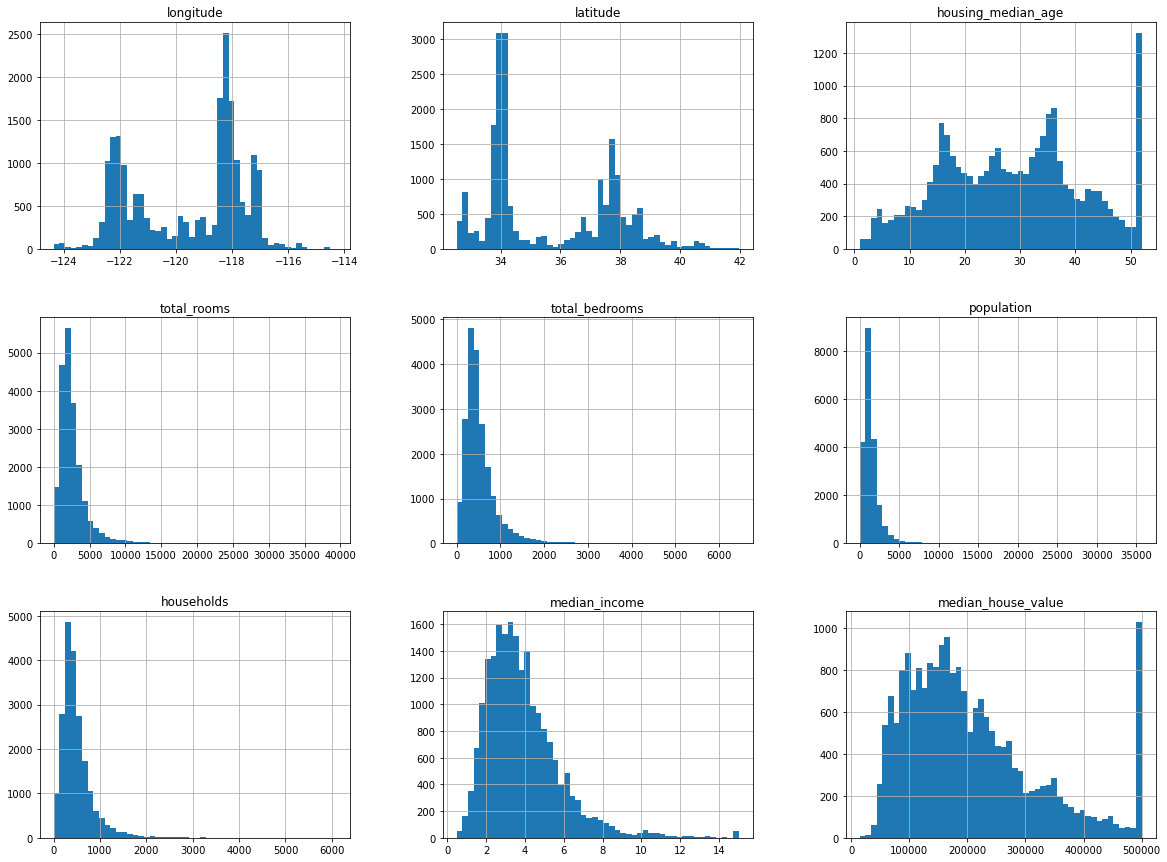

In [74]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Exploratory Data Analysis


In [75]:
corr_matrix = housing.corr()

In [76]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000


<AxesSubplot:>

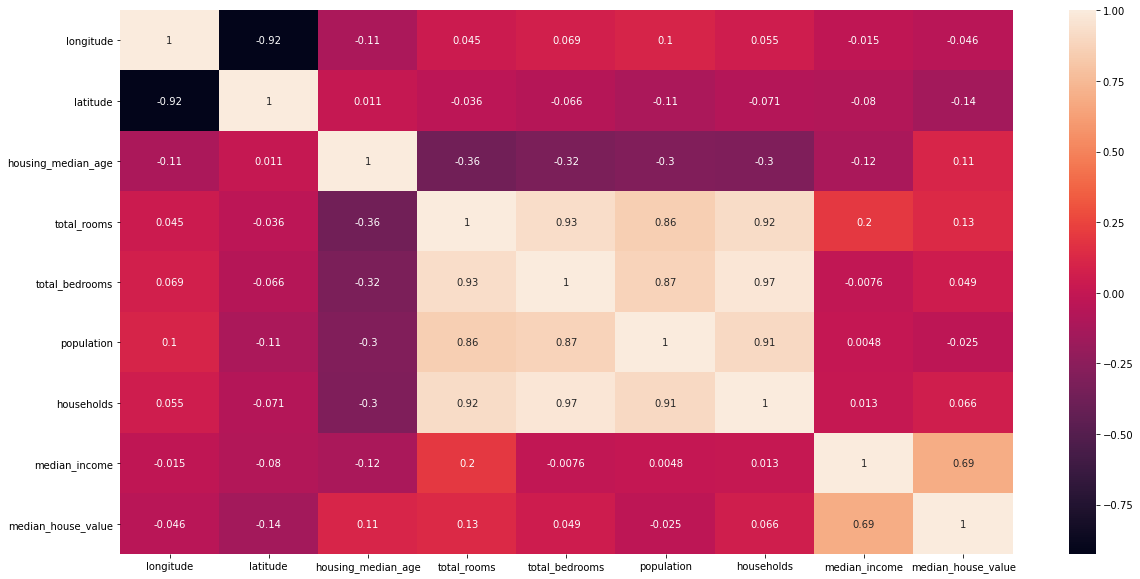

In [77]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True)

In [78]:
from pandas.plotting import scatter_matrix

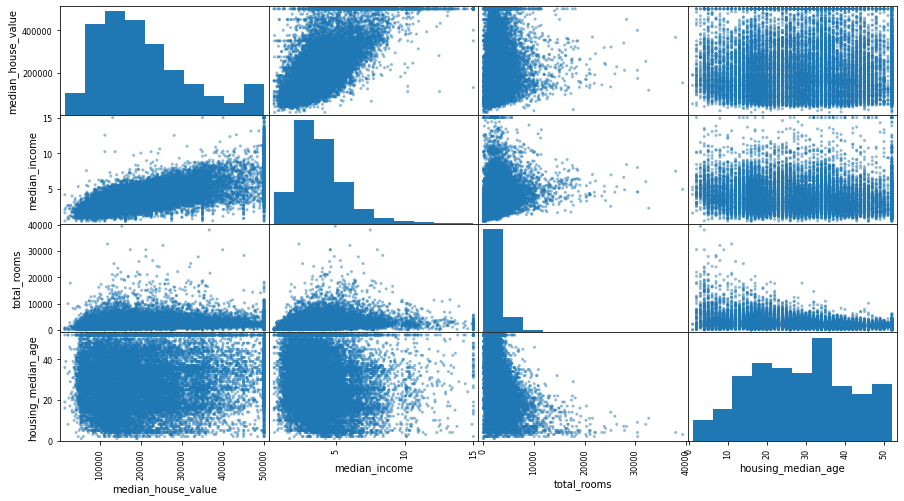

In [79]:
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(15,8));

## Training the model

- Split the dataset

In [157]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 1)

In [167]:
print(X_train)

[[1.0 0.0 0.0 ... 879.0 282.0 3.1908]
 [1.0 0.0 0.0 ... 971.0 303.0 3.6094]
 [1.0 0.0 1.0 ... 20.0 6.0 2.625]
 ...
 [0.0 1.0 0.0 ... 775.0 293.0 1.1326]
 [1.0 0.0 1.0 ... 1323.0 477.0 2.6322]
 [1.0 0.0 0.0 ... 1009.0 390.0 2.3036]]


In [159]:
print(y_train)

[255600. 114600. 137500. ... 104800. 140700. 126000.]


## Feature Scaling

In [222]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,6:] = sc.fit_transform(X_train[:,6:])
X_test[:,6:] = sc.transform(X_test[:,6:])


### Training the Multiple Linear Regression model on the Training set

In [169]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the test set result

In [173]:
y_pred = regressor.predict(X_test)

## Evaluating the model

In [191]:
from sklearn.metrics import mean_squared_error,adjusted_rand_score

In [181]:
lin_mse = mean_squared_error(y_test,y_pred)

In [183]:
np.sqrt(lin_mse)

68937.5016524634

In [192]:
adjusted_rand_score(y_test,y_pred)

-0.002048810806415724

In [184]:
## The error is quite high with a linear model

## Training the Decision Tree Regression model on the dataset

In [195]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [196]:
y_pred = regressor.predict(X_test)

In [197]:
lin_mse = mean_squared_error(y_test,y_pred)

In [198]:
np.sqrt(lin_mse)

69921.91001251472

In [199]:
adjusted_rand_score(y_test,y_pred)

0.22700189847821134

In [194]:
## The perfomance of the regression tree regression model is also not that great


## Training the SVR model on the whole dataset

In [205]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)

SVR(kernel='linear')

In [206]:
y_pred = regressor.predict(X_test)

In [207]:
lin_mse = mean_squared_error(y_test,y_pred)

In [208]:
np.sqrt(lin_mse)

109328.97892009649

In [209]:
adjusted_rand_score(y_test,y_pred)

0.0

## Training the Random Forest Regression model on the whole dataset

In [215]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [216]:
y_pred = regressor.predict(X_test)


In [217]:
lin_mse = mean_squared_error(y_test,y_pred)

In [218]:
np.sqrt(lin_mse)

48894.10871268132

In [219]:
adjusted_rand_score(y_test,y_pred)

0.034936457076013186